In [286]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import os
import scipy.stats as stats
import numpy as np

In [198]:
ListOfTrainFiles = [name for name in sorted(list(os.listdir("Train"))) if ".txt" in name]
print("List of file names:")
print(ListOfTrainFiles)
print(f"cont of files: {len(ListOfTrainFiles)}")

List of file names:
['A1.txt', 'A2.txt', 'A3.txt', 'B1.txt', 'B2.txt', 'B3.txt', 'C1.txt', 'C2.txt', 'C3.txt', 'D1.txt', 'D2.txt', 'D3.txt', 'E1.txt', 'E2.txt', 'E3.txt', 'J1.txt', 'J2.txt', 'J3.txt', 'K1.txt', 'K2.txt', 'K3.txt']
cont of files: 21


In [263]:
def dataset(test=False,list_files=ListOfTrainFiles):
    data = []
    for fileName in list_files:
        if test :
           with open(f"Test/{fileName}") as file:
                file = file.read()
                file = file.replace(".", "0")
                file = file.replace("#", "9")
                file = file.replace("@", "6")
                file = file.replace("o", "4")

        else:
            with open(f"Train/{fileName}") as file:
                file = file.read()
                file = file.replace(".", "0")
                file = file.replace("#", "9")
        file = file.split("\n")
        char_dataframe = pd.DataFrame(list(map(int, str(row))) for row in file)
        sum_column = char_dataframe.sum(axis=0)
        sum_row = char_dataframe.sum(axis=1)
        # print(f"sum of columns file : {fileName}")
        # print(sum_column)
        # print(f"sum of rows file : {fileName}")
        # print(sum_row)
        data.append(list(sum_column)+list(sum_row)+list(fileName[0]))
    return data

In [252]:
dataset()

[[9, 36, 45, 36, 36, 36, 9, 18, 9, 9, 18, 18, 45, 18, 18, 54, 'A'],
 [0, 36, 27, 36, 27, 36, 0, 9, 9, 9, 18, 18, 18, 45, 18, 18, 'A'],
 [27, 27, 27, 27, 27, 27, 27, 9, 9, 18, 18, 18, 45, 18, 18, 36, 'A'],
 [18, 81, 27, 27, 27, 27, 54, 54, 18, 18, 18, 45, 18, 18, 18, 54, 'B'],
 [81, 27, 27, 27, 27, 27, 54, 54, 18, 18, 18, 54, 18, 18, 18, 54, 'B'],
 [18, 81, 27, 27, 27, 27, 54, 54, 18, 18, 45, 18, 18, 18, 18, 54, 'B'],
 [0, 63, 18, 18, 18, 18, 27, 45, 18, 9, 9, 9, 9, 9, 18, 36, 'C'],
 [45, 18, 18, 18, 18, 18, 18, 27, 18, 18, 9, 9, 9, 18, 18, 27, 'C'],
 [45, 18, 18, 18, 18, 18, 36, 36, 27, 18, 9, 9, 9, 18, 18, 27, 'C'],
 [18, 81, 18, 18, 18, 18, 45, 45, 18, 18, 18, 18, 18, 18, 18, 45, 'D'],
 [81, 18, 18, 18, 18, 18, 45, 45, 18, 18, 18, 18, 18, 18, 18, 45, 'D'],
 [18, 81, 18, 18, 18, 18, 45, 45, 18, 18, 18, 18, 18, 18, 18, 45, 'D'],
 [18, 81, 27, 45, 18, 18, 36, 63, 18, 9, 18, 27, 18, 9, 18, 63, 'E'],
 [81, 27, 27, 27, 27, 18, 18, 63, 9, 9, 9, 45, 9, 9, 9, 63, 'E'],
 [18, 81, 27, 27, 45, 1

# sum of columns = SOC
# sum of rows = SOR

In [253]:
columns=  [f"SOC-{x}" for x in range(1,8)] + [ f"SOR-{x}" for x in range(1,10)] +["Label"]
df=pd.DataFrame(dataset(),columns=columns)
df

,SOC-1,SOC-2,SOC-3,SOC-4,SOC-5,SOC-6,SOC-7,SOR-1,SOR-2,SOR-3,SOR-4,SOR-5,SOR-6,SOR-7,SOR-8,SOR-9,Label
0,9,36,45,36,36,36,9,18,9,9,18,18,45,18,18,54,A
1,0,36,27,36,27,36,0,9,9,9,18,18,18,45,18,18,A
2,27,27,27,27,27,27,27,9,9,18,18,18,45,18,18,36,A
3,18,81,27,27,27,27,54,54,18,18,18,45,18,18,18,54,B
4,81,27,27,27,27,27,54,54,18,18,18,54,18,18,18,54,B
5,18,81,27,27,27,27,54,54,18,18,45,18,18,18,18,54,B
6,0,63,18,18,18,18,27,45,18,9,9,9,9,9,18,36,C
7,45,18,18,18,18,18,18,27,18,18,9,9,9,18,18,27,C
8,45,18,18,18,18,18,36,36,27,18,9,9,9,18,18,27,C
9,18,81,18,18,18,18,45,45,18,18,18,18,18,18,18,45,D


In [309]:
cols = list (df.columns)
cols.remove("Label")
for col in cols:
    df[col]=stats.zscore(df[col])
    # df[col] = (df[col] - df[col].mean())/df[col].std(ddof=0)
df

,SOC-1,SOC-2,SOC-3,SOC-4,SOC-5,SOC-6,SOC-7,SOR-1,SOR-2,SOR-3,SOR-4,SOR-5,SOR-6,SOR-7,SOR-8,SOR-9,Label
0,-0.679948,-0.351048,2.587097,1.496264,1.788854,0.307784,-0.970703,-1.176038,-1.305582,-1.274755,0.098058,-0.172929,2.791989,0.117444,0.223607,0.869652,A
1,-0.997257,-0.351048,0.497519,1.496264,0.614919,0.307784,-1.467893,-1.680054,-1.305582,-1.274755,0.098058,-0.172929,0.085907,3.816931,0.223607,-1.649340,A
2,-0.045330,-0.658216,0.497519,0.448879,0.614919,-0.189405,0.023676,-1.680054,-1.305582,0.784465,0.098058,-0.172929,2.791989,0.117444,0.223607,-0.389844,A
3,-0.362639,1.184788,0.497519,0.448879,0.614919,-0.189405,1.515244,0.840027,0.522233,0.784465,0.098058,2.005972,0.085907,0.117444,0.223607,0.869652,B
4,1.858523,-0.658216,0.497519,0.448879,0.614919,-0.189405,1.515244,0.840027,0.522233,0.784465,0.098058,2.732272,0.085907,0.117444,0.223607,0.869652,B
5,-0.362639,1.184788,0.497519,0.448879,0.614919,-0.189405,1.515244,0.840027,0.522233,0.784465,3.186887,-0.172929,0.085907,0.117444,0.223607,0.869652,B
6,-0.997257,0.570454,-0.547270,-0.598506,-0.559017,-0.686595,0.023676,0.336011,0.522233,-1.274755,-0.931552,-0.899229,-0.816120,-1.115718,0.223607,-0.389844,C
7,0.589288,-0.965383,-0.547270,-0.598506,-0.559017,-0.686595,-0.473514,-0.672022,0.522233,0.784465,-0.931552,-0.899229,-0.816120,0.117444,0.223607,-1.019592,C
8,0.589288,-0.965383,-0.547270,-0.598506,-0.559017,-0.686595,0.520865,-0.168005,2.350048,0.784465,-0.931552,-0.899229,-0.816120,0.117444,0.223607,-1.019592,C
9,-0.362639,1.184788,-0.547270,-0.598506,-0.559017,-0.686595,1.018055,0.336011,0.522233,0.784465,0.098058,-0.172929,0.085907,0.117444,0.223607,0.239904,D


In [305]:
df.sum()

SOC-1                     -0.0
SOC-2                      0.0
SOC-3                      0.0
SOC-4                     -0.0
SOC-5                      0.0
SOC-6                      0.0
SOC-7                      0.0
SOR-1                      0.0
SOR-2                     -0.0
SOR-3                     -0.0
SOR-4                      0.0
SOR-5                     -0.0
SOR-6                      0.0
SOR-7                      0.0
SOR-8                     -0.0
SOR-9                     -0.0
Label    AAABBBCCCDDDEEEJJJKKK
dtype: object

(array([3., 0., 7., 0., 0., 9., 0., 1., 0., 1.]),
 array([-1.5920595 , -1.17414388, -0.75622826, -0.33831264,  0.07960298,
         0.4975186 ,  0.91543421,  1.33334983,  1.75126545,  2.16918107,
         2.58709669]),
 <BarContainer object of 10 artists>)

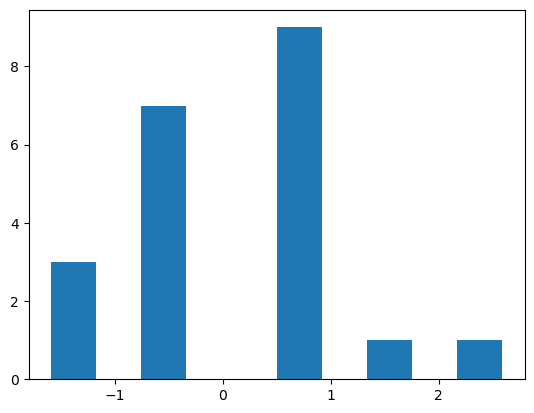

In [307]:
plt.hist(X_train["SOC-3"])

In [257]:
Y_train=df["Label"].values
Y_train

array(['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'D', 'D', 'D', 'E',
       'E', 'E', 'J', 'J', 'J', 'K', 'K', 'K'], dtype=object)

In [258]:
X_train= df[cols]
X_train

,SOC-1,SOC-2,SOC-3,SOC-4,SOC-5,SOC-6,SOC-7,SOR-1,SOR-2,SOR-3,SOR-4,SOR-5,SOR-6,SOR-7,SOR-8,SOR-9
0,-0.679948,-0.351048,2.587097,1.496264,1.788854,0.307784,-0.970703,-1.176038,-1.305582,-1.274755,0.098058,-0.172929,2.791989,0.117444,0.223607,0.869652
1,-0.997257,-0.351048,0.497519,1.496264,0.614919,0.307784,-1.467893,-1.680054,-1.305582,-1.274755,0.098058,-0.172929,0.085907,3.816931,0.223607,-1.649340
2,-0.045330,-0.658216,0.497519,0.448879,0.614919,-0.189405,0.023676,-1.680054,-1.305582,0.784465,0.098058,-0.172929,2.791989,0.117444,0.223607,-0.389844
3,-0.362639,1.184788,0.497519,0.448879,0.614919,-0.189405,1.515244,0.840027,0.522233,0.784465,0.098058,2.005972,0.085907,0.117444,0.223607,0.869652
4,1.858523,-0.658216,0.497519,0.448879,0.614919,-0.189405,1.515244,0.840027,0.522233,0.784465,0.098058,2.732272,0.085907,0.117444,0.223607,0.869652
5,-0.362639,1.184788,0.497519,0.448879,0.614919,-0.189405,1.515244,0.840027,0.522233,0.784465,3.186887,-0.172929,0.085907,0.117444,0.223607,0.869652
6,-0.997257,0.570454,-0.547270,-0.598506,-0.559017,-0.686595,0.023676,0.336011,0.522233,-1.274755,-0.931552,-0.899229,-0.816120,-1.115718,0.223607,-0.389844
7,0.589288,-0.965383,-0.547270,-0.598506,-0.559017,-0.686595,-0.473514,-0.672022,0.522233,0.784465,-0.931552,-0.899229,-0.816120,0.117444,0.223607,-1.019592
8,0.589288,-0.965383,-0.547270,-0.598506,-0.559017,-0.686595,0.520865,-0.168005,2.350048,0.784465,-0.931552,-0.899229,-0.816120,0.117444,0.223607,-1.019592
9,-0.362639,1.184788,-0.547270,-0.598506,-0.559017,-0.686595,1.018055,0.336011,0.522233,0.784465,0.098058,-0.172929,0.085907,0.117444,0.223607,0.239904


In [275]:
k = 1
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
neigh

KNeighborsClassifier(n_neighbors=1)

In [276]:

print("Train set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))


Train set Accuracy:  1.0


In [277]:
ListOfTestFiles = [name for name in sorted(list(os.listdir("Test"))) if ".txt" in name]
print("List of file names:")
print(ListOfTrainFiles)
print(f"cont of files: {len(ListOfTrainFiles)}")

List of file names:
['A1.txt', 'A2.txt', 'A3.txt', 'B1.txt', 'B2.txt', 'B3.txt', 'C1.txt', 'C2.txt', 'C3.txt', 'D1.txt', 'D2.txt', 'D3.txt', 'E1.txt', 'E2.txt', 'E3.txt', 'J1.txt', 'J2.txt', 'J3.txt', 'K1.txt', 'K2.txt', 'K3.txt']
cont of files: 21


In [278]:
dataset(test=True,list_files=ListOfTestFiles)

[[9, 31, 51, 42, 36, 37, 9, 18, 15, 9, 24, 18, 45, 24, 18, 44, 'A'],
 [12, 26, 27, 31, 23, 26, 6, 9, 4, 9, 18, 13, 18, 40, 14, 26, 'A'],
 [27, 22, 33, 28, 27, 22, 27, 9, 9, 18, 18, 18, 30, 18, 18, 48, 'A'],
 [18, 76, 39, 33, 27, 27, 54, 54, 13, 18, 24, 45, 24, 24, 18, 54, 'B'],
 [71, 27, 27, 28, 27, 27, 49, 54, 18, 13, 18, 44, 18, 18, 19, 54, 'B'],
 [36, 81, 27, 27, 27, 27, 49, 54, 24, 18, 45, 24, 18, 19, 18, 54, 'B'],
 [6, 58, 24, 18, 30, 18, 27, 45, 30, 9, 15, 4, 9, 9, 24, 36, 'C'],
 [45, 24, 18, 24, 18, 19, 13, 27, 18, 18, 9, 27, 9, 13, 13, 27, 'C'],
 [40, 18, 13, 18, 18, 18, 42, 36, 27, 18, 9, 15, 4, 18, 18, 22, 'C'],
 [18, 81, 30, 24, 18, 18, 35, 45, 24, 13, 24, 13, 18, 18, 24, 45, 'D'],
 [66, 24, 24, 18, 18, 18, 45, 40, 18, 18, 18, 30, 18, 13, 18, 40, 'D'],
 [18, 81, 24, 30, 18, 18, 35, 45, 18, 18, 18, 25, 18, 13, 24, 45, 'D'],
 [24, 81, 17, 45, 24, 18, 36, 58, 18, 9, 18, 28, 18, 9, 24, 63, 'E'],
 [66, 27, 39, 27, 27, 18, 18, 58, 9, 9, 9, 40, 9, 15, 15, 58, 'E'],
 [19, 76, 27, 22

In [279]:
df_test=pd.DataFrame(dataset(test=True,list_files=ListOfTestFiles),columns=columns)
df_test

,SOC-1,SOC-2,SOC-3,SOC-4,SOC-5,SOC-6,SOC-7,SOR-1,SOR-2,SOR-3,SOR-4,SOR-5,SOR-6,SOR-7,SOR-8,SOR-9,Label
0,9,31,51,42,36,37,9,18,15,9,24,18,45,24,18,44,A
1,12,26,27,31,23,26,6,9,4,9,18,13,18,40,14,26,A
2,27,22,33,28,27,22,27,9,9,18,18,18,30,18,18,48,A
3,18,76,39,33,27,27,54,54,13,18,24,45,24,24,18,54,B
4,71,27,27,28,27,27,49,54,18,13,18,44,18,18,19,54,B
5,36,81,27,27,27,27,49,54,24,18,45,24,18,19,18,54,B
6,6,58,24,18,30,18,27,45,30,9,15,4,9,9,24,36,C
7,45,24,18,24,18,19,13,27,18,18,9,27,9,13,13,27,C
8,40,18,13,18,18,18,42,36,27,18,9,15,4,18,18,22,C
9,18,81,30,24,18,18,35,45,24,13,24,13,18,18,24,45,D


In [280]:
for col in cols:
    df_test[col] = (df_test[col] - df_test[col].mean())/df_test[col].std(ddof=0)
df_test

,SOC-1,SOC-2,SOC-3,SOC-4,SOC-5,SOC-6,SOC-7,SOR-1,SOR-2,SOR-3,SOR-4,SOR-5,SOR-6,SOR-7,SOR-8,SOR-9,Label
0,-0.830653,-0.454065,2.348656,1.949170,1.874530,0.530602,-1.025418,-1.063694,-0.266285,-1.316269,0.714421,-0.227102,3.176397,0.988483,-0.144164,0.295093,A
1,-0.696470,-0.625565,0.184629,0.742043,0.000000,-0.139174,-1.208424,-1.575241,-2.023765,-1.316269,0.016614,-0.660661,0.194581,3.294944,-1.245052,-1.017202,A
2,-0.025559,-0.762764,0.725636,0.412827,0.576778,-0.382729,0.072622,-1.575241,-1.224910,0.885278,0.016614,-0.227102,1.519832,0.123560,-0.144164,0.586714,A
3,-0.428106,1.089430,1.266643,0.961521,0.576778,-0.078286,1.719681,0.982496,-0.585827,0.885278,0.714421,2.114115,0.857206,0.988483,-0.144164,1.024145,B
4,1.942449,-0.591265,0.184629,0.412827,0.576778,-0.078286,1.414670,0.982496,0.213028,-0.337804,0.016614,2.027403,0.194581,0.123560,0.131058,1.024145,B
5,0.376988,1.260930,0.184629,0.303088,0.576778,-0.078286,1.414670,0.982496,1.171653,0.885278,3.156744,0.293168,0.194581,0.267714,-0.144164,1.024145,B
6,-0.964835,0.472032,-0.085874,-0.684561,1.009362,-0.626284,0.072622,0.470948,2.130279,-1.316269,-0.332289,-1.441066,-0.799358,-1.173824,1.507168,-0.288149,C
7,0.779535,-0.694165,-0.626881,-0.026128,-0.720973,-0.565396,-0.781409,-0.552146,0.213028,0.885278,-1.030096,0.553303,-0.799358,-0.597209,-1.520274,-0.944296,C
8,0.555898,-0.899964,-1.077720,-0.684561,-0.720973,-0.626284,0.987655,-0.040599,1.650966,0.885278,-1.030096,-0.487237,-1.351546,0.123560,-0.144164,-1.308823,C
9,-0.428106,1.260930,0.455133,-0.026128,-0.720973,-0.626284,0.560639,0.470948,1.171653,-0.337804,0.714421,-0.660661,0.194581,0.123560,1.507168,0.367998,D


In [296]:
plt.hist(X_Train)

NameError: name 'X_Train' is not defined

In [295]:
df_test.sum()

SOC-1                     -0.0
SOC-2                     -0.0
SOC-3                     -0.0
SOC-4                      0.0
SOC-5                     -0.0
SOC-6                      0.0
SOC-7                     -0.0
SOR-1                     -0.0
SOR-2                     -0.0
SOR-3                     -0.0
SOR-4                     -0.0
SOR-5                     -0.0
SOR-6                      0.0
SOR-7                      0.0
SOR-8                     -0.0
SOR-9                      0.0
Label    AAABBBCCCDDDEEEJJJKKK
dtype: object

In [282]:
Y_test=df_test["Label"].values
print(Y_test)
X_test= df_test[cols]
print(X_test)

['A' 'A' 'A' 'B' 'B' 'B' 'C' 'C' 'C' 'D' 'D' 'D' 'E' 'E' 'E' 'J' 'J' 'J'
 'K' 'K' 'K']
       SOC-1     SOC-2     SOC-3     SOC-4     SOC-5     SOC-6     SOC-7  \
0  -0.830653 -0.454065  2.348656  1.949170  1.874530  0.530602 -1.025418   
1  -0.696470 -0.625565  0.184629  0.742043  0.000000 -0.139174 -1.208424   
2  -0.025559 -0.762764  0.725636  0.412827  0.576778 -0.382729  0.072622   
3  -0.428106  1.089430  1.266643  0.961521  0.576778 -0.078286  1.719681   
4   1.942449 -0.591265  0.184629  0.412827  0.576778 -0.078286  1.414670   
5   0.376988  1.260930  0.184629  0.303088  0.576778 -0.078286  1.414670   
6  -0.964835  0.472032 -0.085874 -0.684561  1.009362 -0.626284  0.072622   
7   0.779535 -0.694165 -0.626881 -0.026128 -0.720973 -0.565396 -0.781409   
8   0.555898 -0.899964 -1.077720 -0.684561 -0.720973 -0.626284  0.987655   
9  -0.428106  1.260930  0.455133 -0.026128 -0.720973 -0.626284  0.560639   
10  1.718812 -0.694165 -0.085874 -0.684561 -0.720973 -0.626284  1.170661   
1

(array([[ 0.,  2.,  5.,  6.,  2.,  2.,  0.,  4.,  0.,  0.],
        [ 0.,  3.,  5.,  4.,  1.,  0.,  8.,  0.,  0.,  0.],
        [ 1.,  2.,  2.,  5.,  6.,  1.,  3.,  0.,  1.,  0.],
        [ 0.,  3.,  5.,  1.,  7.,  3.,  0.,  1.,  1.,  0.],
        [ 1.,  0.,  9.,  0.,  3.,  6.,  0.,  1.,  1.,  0.],
        [ 0.,  1.,  0., 11.,  5.,  1.,  0.,  2.,  1.,  0.],
        [ 0.,  3.,  4.,  3.,  2.,  5.,  3.,  1.,  0.,  0.],
        [ 0.,  4.,  1.,  4.,  5.,  4.,  3.,  0.,  0.,  0.],
        [ 1.,  4.,  0.,  3.,  9.,  0.,  2.,  2.,  0.,  0.],
        [ 0.,  7.,  0.,  2.,  1., 11.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  6.,  2.,  8.,  3.,  0.,  1.,  0.,  1.],
        [ 0.,  2.,  5.,  6.,  2.,  3.,  0.,  3.,  0.,  0.],
        [ 0.,  2.,  6.,  0., 10.,  1.,  1.,  0.,  0.,  1.],
        [ 0.,  0.,  4.,  5.,  8.,  3.,  0.,  0.,  0.,  1.],
        [ 0.,  4.,  1.,  8.,  3.,  0.,  5.,  0.,  0.,  0.],
        [ 1.,  1.,  5.,  1.,  6.,  5.,  1.,  1.,  0.,  0.]]),
 array([-2.32949603, -1.767052  , -1.2

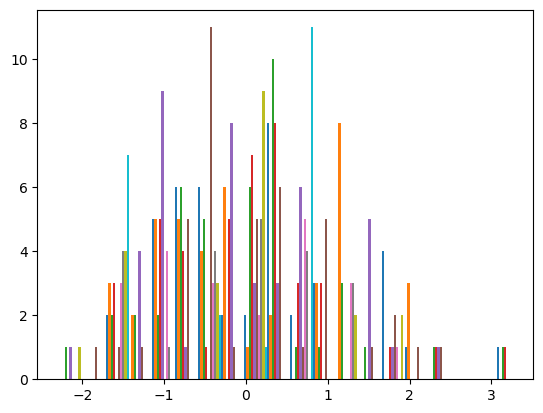

In [294]:
plt.hist(X_test)

In [292]:
yhat = neigh.predict(X_test)
yhat

array(['A', 'A', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'B', 'B', 'B', 'B',
       'D', 'B', 'C', 'C', 'C', 'B', 'C', 'C'], dtype=object)

In [284]:
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, yhat))

Test set Accuracy:  1.0


In [288]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([1.        , 0.71428571, 0.76190476, 0.71428571, 0.61904762,
       0.57142857, 0.47619048, 0.38095238, 0.52380952, 0.52380952,
       0.38095238, 0.38095238, 0.38095238, 0.38095238])

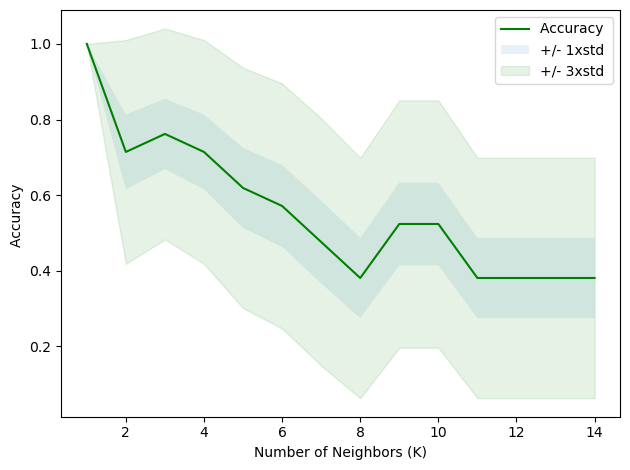

In [289]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [290]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 1.0 with k= 1
